In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# - Exercici 1

**Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament**.

Crea almenys una visualització per:

1. Una variable categòrica (Districte o Barri)
2. Una variable numèrica (Preu)
3. Una variable numèrica i una categòrica (Districte i Preu)
4. Dues variables numèriques (Any o Trimestre i Preu)
5. Tres variables (Barri o Districte, Trimestre i Preu)

## Descàrrega y resumen estadístic del dataframe

##### Descarraguem el dataset i després fem un cop d'ull a les seves primeres 10 files.

In [2]:
df = pd.read_csv('preu lloguer per trimestre i barri.csv')
df.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


##### Ara mirem de manera ràpida els tipus de dades, totes les columnes i el rang.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


##### Hem vist que la columne 'Preu' que porta valors numèrics és declarada com a object. Per a tant hem de posarla com a valor numèric per no tenir problemes amb els càlculs més endavant.

##### La funció 'pd.numeric' és més potent que la funció 'astype'. Aixó bàsicament perquè  a travès de 'pd.numeric' i els seus arguments podem djustar possibles errors que tingui la columna i posar-los com a NaN's.

In [4]:
# A través del argument 'coerce' qualsevol valor no numèric serà convertit en NaN.

df["Preu"] = pd.to_numeric(df["Preu"], errors="coerce")

print(df.dtypes)

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object


##### És fonamental fer un describe per tenir les primeres estatístiques básicas del dataframe.

In [5]:
df.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2021.0,2.500000,6.246575,37.000000,442.157222
std,0.0,1.118992,2.790726,21.089371,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,12.775000
50%,2021.0,2.500000,7.000000,37.000000,232.750000
75%,2021.0,3.250000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


##### Podem veure que el codi anterior no descriu totes les columnes del dataframe. Això pot passar per varios motius. Un d'aquests pot ser perquè només s'ha aplicat la funció a les variables de tipus numèric. Ara inclorem totes les variables posant l'argument 'all'. Per tant vaurem no només veurem les típiques estatístiques de les variables numèriques sino que també ens mostrarà estatístiques per visualitzar variables categòriques.

In [6]:
df.describe(include='all')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
count,584.0,584.000000,584.000000,584,584.000000,584,584,540.000000
unique,NaN,NaN,NaN,10,NaN,73,2,NaN
top,NaN,NaN,NaN,Nou Barris,NaN,el Raval,Lloguer mitjà mensual (Euros/mes),NaN
freq,NaN,NaN,NaN,104,NaN,8,292,NaN
mean,2021.0,2.500000,6.246575,NaN,37.000000,NaN,NaN,442.157222
std,0.0,1.118992,2.790726,NaN,21.089371,NaN,NaN,457.358745
min,2021.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,6.700000
25%,2021.0,1.750000,4.000000,NaN,19.000000,NaN,NaN,12.775000
50%,2021.0,2.500000,7.000000,NaN,37.000000,NaN,NaN,232.750000
75%,2021.0,3.250000,8.000000,NaN,55.000000,NaN,NaN,815.875000


##### Ara que ja podem veure la taula sencera, farem una petita descripció general del dataset fins ara:

1. Tenim 584 registres en 8 columnes del any 2021, on el barri més frequent que podem trobar és El Raval.
2. El dataset disposa de 10 districtes diferents on és distribueixen 73 barris.
3. El preu de lloguer mitjà es de 442€, però la columna 'Lloguer_mitjà porta dues categories' que hem de conèixer i que podria afectar el valor d'aquest preu (l'hem de revisar).
4. Podem observar que el dataset presenta valors NaN's que hauriem de veure que fem amb ells. Podríem per exemple omplir-los amb zeros o eliminar-los directament perque no tinguin influencia en la mitjà del lloguer posteriorment. Per un altre banda podriem substituir els nan's per la mitjana del seu barri.

##### Mirarem quines son les dues categories de la columne 'lloguer_mitja' per entendre que haurem de fer desprès.

In [7]:
df.Lloguer_mitja.unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

##### La columne porta dues categories que han de reflexar preus molt diferents. Per una banda, tenim la mitjà mensual del lloguer i per un altre el preu mitjà del metre quadrat, per tant la primera categoria ha de tenir valors molt més alts que la segona categoria. Per això tenim una dada mínima de 6 € i una máxima de 1.816 €. Al que farem llavors serà produir dos dataframes diferents. Un dataframe tindrà només les dades de la primera categoria i el segon les dades de la segona.

##### Seleccionarem llavors pel primer df aquelles files iguals a 'Lloguer mitjà mensual (Euros/mes)', sota el nom de llog_mig

In [8]:
llog_mig = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
llog_mig.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


##### Ara seleccionarem per la creació del segon df aquelles files iguals a 'Lloguer mitjà per superfície (Euros/m2 mes)', sota el nom de llog_m2

In [9]:
llog_m2 = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
llog_m2.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
78,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà per superfície (Euros/m2 mes),13.5
79,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.0
80,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.7
81,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.6
82,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà per superfície (Euros/m2 mes),12.5


In [10]:
# revisem els Nan's. Veiem que la meitat son aquí en aquest dataframe, per tant l'altre meitat seren a l'altre df.
llog_mig.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              22
dtype: int64

In [11]:
# Primer de tot calcularem la mitjà de 'Lloguer mitjà mensual (Euros/mes)' per barri.

llog_mig_barri = df.groupby('Nom_Barri')['Preu'].mean()
llog_mig_barri.head(10)

Nom_Barri
Baró de Viver                                   270.0250
Can Baró                                        384.5125
Can Peguera                                          NaN
Canyelles                                       375.8500
Ciutat Meridiana                                267.3000
Diagonal Mar i el Front Marítim del Poblenou    544.7375
Horta                                           380.6750
Hostafrancs                                     402.2125
Montbau                                         375.7750
Navas                                           416.2000
Name: Preu, dtype: float64

##### El observar les primeres 10 dades amb la mitjà mensual veiem que el barri 'Can Peguera' mostra valors NaN. Això ens està advertint que potser tots el valors d'aquest barri i d'altres ni tinguin cap dada per calcular la mitjà. Ho corroborarem ara mateix.

In [12]:
#càlcul del valors NaN's en total del barri Can Peguera
nan_valors = llog_mig['Preu'][llog_mig['Nom_Barri'] == 'Can Peguera'].isnull().sum()

nan_valors

4

In [13]:
# Revisió de totes les dades del barri Can Peguera.
dades_can_peguera = llog_mig.loc[llog_mig['Nom_Barri'] == 'Can Peguera', 'Preu']
dades_can_peguera

46    NaN
192   NaN
338   NaN
484   NaN
Name: Preu, dtype: float64

##### Les dades anteriors ens fan pendre la decisió de pujar l'escala d'anàlisi. Per tant, farem servir el nivell de districte per calcular la mitjà. Aquí hauriem de tenir almenys una dada numèrica per districte.  

In [14]:
# Ara llavors calcularem la mitjà de 'Lloguer mitjà mensual (Euros/mes)' per districte.

llog_mig_dist = df.groupby('Nom_Districte')['Preu'].mean()
llog_mig_dist

Nom_Districte
Ciutat Vella           436.350000
Eixample               506.922917
Gràcia                 445.322500
Horta-Guinardó         388.497500
Les Corts              614.037500
Nou Barris             337.607500
Sant Andreu            366.175000
Sant Martí             464.945000
Sants-Montjuïc         405.805357
Sarrià-Sant Gervasi    643.112500
Name: Preu, dtype: float64

##### Podem veure que tots els districtes tenen valors de mitjà.

##### Ara substituirem els nan's per la mitjà del valors del districte de manera de perdre'ls. Començarem pel primer dataframe. 'llog_mig'

In [15]:
# Ara que tenim la mitjà substituirem els nan's per aquest valor.

llog_mig['Preu'] = llog_mig['Preu'].fillna(llog_mig['Nom_Districte'].map(llog_mig_dist))

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_10960\2399639207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llog_mig['Preu'] = llog_mig['Preu'].fillna(llog_mig['Nom_Districte'].map(llog_mig_dist))


##### El missatge en vermell ens adverteix que el resultat no serà del tot fiable. Allò ens indica una manera de corregir el codi creat però no acabo d'entendre com fer-ho (i no hem dona temps). Malgrat això el resultat que lliura sembla bé (veure les cel·les més andavant), perquè ja no veiem nan's. Per un altre costat, les estadístiques generals també es veuen bé. Tanmateix i malgrat això el que farem serà nomès eliminar els nan's de dos nous dataframes.

In [16]:
# Mirem com ha quedat la taula.
llog_mig.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [17]:
llog_mig.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [18]:
llog_mig.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.000000,292.000000,292.000000,292.000000
mean,2021.0,2.500000,6.246575,37.000000,833.188875
std,0.0,1.119953,2.793123,21.107481,251.896155
min,2021.0,1.000000,1.000000,1.000000,337.607500
25%,2021.0,1.750000,4.000000,19.000000,703.350000
50%,2021.0,2.500000,7.000000,37.000000,804.950000
75%,2021.0,3.250000,8.000000,55.000000,927.750000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


##### Llavors comencem  un altre cop.

##### Dividim el dataframe de l'inici en dos. El primer el cridarem per 'llog_mitja' que contindrà només el 'Lloguer mitjà mensual (Euros/mes)'

In [19]:
llog_mitja = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
llog_mitja.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [20]:
# amb nan's
llog_mitja.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              22
dtype: int64

In [21]:
#sense nan's
llog_mitja = llog_mitja.dropna()
llog_mitja.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

##### Com que no hem tocat el segon dataframe, llavors el farem servir.

In [22]:
# amb nan's
llog_m2.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              22
dtype: int64

In [23]:
# sense nan's
llog_m2 = llog_m2.dropna()
llog_m2.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

#### Resumen estadístic general 'Lloguer Mitjà mensual'

In [24]:
llog_mitja.describe(include='all')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
count,270.0,270.000000,270.000000,270,270.000000,270,270,270.000000
unique,NaN,NaN,NaN,10,NaN,68,1,NaN
top,NaN,NaN,NaN,Horta-Guinardó,NaN,el Raval,Lloguer mitjà mensual (Euros/mes),NaN
freq,NaN,NaN,NaN,40,NaN,4,270,NaN
mean,2021.0,2.503704,6.185185,NaN,36.459259,NaN,NaN,871.593704
std,0.0,1.120104,2.842024,NaN,21.390949,NaN,NaN,221.192799
min,2021.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,447.500000
25%,2021.0,2.000000,3.250000,NaN,18.250000,NaN,NaN,742.475000
50%,2021.0,2.500000,7.000000,NaN,35.000000,NaN,NaN,816.350000
75%,2021.0,3.750000,8.000000,NaN,55.000000,NaN,NaN,934.525000


1. El dataframe que descriu el 'Lloguer mitjà mensual (Euros/mes)' té 270 registres distribuits en 10 districtes i 68 barris. El districte que més és repeteix és Horta-Guinardó (40 cops), mentre que El Raval és el barri més frequent (4 cops)
2. La mitjà de tots el preus de lloguer mensual de la mostra arriben a 871.59 euros.
3. El preu de lloguer mensual promig més alt arribe a 1816.5 euros i el més baix és de 221,19 euros, amb un rang de 1595.31 euros.
4. Finalment la desviació stàndar de les dades és de 221 euros, amb el que podriem dir que aquesta desviació és petita, sobretot considerant la mitjà de 871,59 euros i que el 75% de les dades no supera els 934.5 euros de lloguer mensual.


#### Resumen estadístic general 'Lloguer mitjà per superfície (Euros/m2 mes)'

In [25]:
llog_m2.describe(include='all')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
count,270.0,270.000000,270.000000,270,270.000000,270,270,270.000000
unique,NaN,NaN,NaN,10,NaN,68,1,NaN
top,NaN,NaN,NaN,Horta-Guinardó,NaN,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),NaN
freq,NaN,NaN,NaN,40,NaN,4,270,NaN
mean,2021.0,2.503704,6.185185,NaN,36.459259,NaN,NaN,12.720741
std,0.0,1.120104,2.842024,NaN,21.390949,NaN,NaN,1.701480
min,2021.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,6.700000
25%,2021.0,2.000000,3.250000,NaN,18.250000,NaN,NaN,11.625000
50%,2021.0,2.500000,7.000000,NaN,35.000000,NaN,NaN,12.750000
75%,2021.0,3.750000,8.000000,NaN,55.000000,NaN,NaN,13.600000


1. El dataframe que descriu el 'Lloguer mitjà per superfície (Euros/m2 mes)', ens parla d'una mesura del valor del sòl segons quins barri i quins districte. Aquest dataframe té 270 registres (els metixos que 'llog_mig') distribuits en 10 districtes i 68 barris. El districte que més és repeteix és Horta-Guinardó (40 cops), mentre que El Raval és el barri més frequent (4 cops)
2. La mitjà de tots el preus per m2 de la mostra arriben a 12.72 euros.
3. El preu del m2 mensual més alt arribe a 18 euros i el més baix és de 6.7 euros, amb un rang de 11.3 euros.
4. Finalment la desviació stàndar de les dades és 1.7 euros, amb el que podriem dir el igual que en el data frame anterior que aquesta desviació és petita, sobretot considerant la mitjà de 12.72 euros i que el 75% de les dades no supera els 13.6 euros de lloguer per m2.


## Crea almenys una visualització per:

### 1. Una variable categòrica (Districte o Barri)

##### Per aquest primer exercici en particular farem servir el dataframe original que compta amb tots els 584 registres

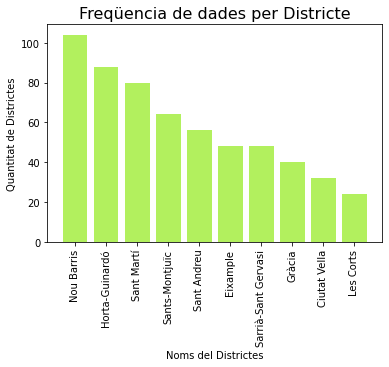

In [26]:
# Creem la variable a representar. Freqüencia de districtes a la ciutat de Barcelona.
freq_distr = df['Nom_Districte'].value_counts()

# Per començar creem una figura buida i dos objectes: figures i axes.
fig, ax = plt.subplots()

# Cridem un gráfic de barras amb posició vertical. Aquí assignarem el color amb notació hexadecimal.
ax.bar(freq_distr.index, freq_distr.values, color='#B2F05E')

# Hem de rotar la posicióde les etiquetes en 90 graus perquè es puguin veure bé. 
plt.xticks(rotation=90)

ax.set_title('Freqüencia de dades per Districte', fontsize=16)
ax.set_xlabel('Noms del Districtes')
ax.set_ylabel('Quantitat de Districtes')
plt.savefig('Freq_distr_bar.png')

plt.show()

##### Ara farem el mateix però en un gràfic horitzontal. Aquí, ja no necessitarem rotar les etiquetes en 90 graus perquè per la seva posició per defecte i el llarg dels noms és veuren bé.

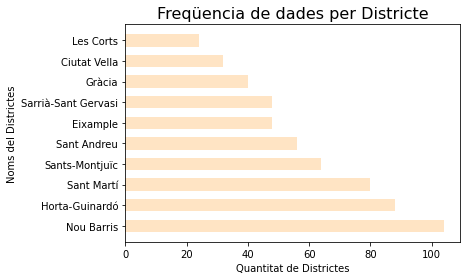

In [27]:
freq_distr = df['Nom_Districte'].value_counts()

fig, ax = plt.subplots()

ax.barh(freq_distr.index, freq_distr.values, height=0.6, color='#FFE4C4')
ax.set_title('Freqüencia de dades per Districte', fontsize=16)
ax.set_xlabel('Quantitat de Districtes')
ax.set_ylabel('Noms del Districtes')
plt.savefig('Freq_distr_barh.png')

plt.show()


### Comentaris dels gráfics

1. Hem fet dos gràfics de barres (vertical i horitzontal respectivament), posant les característiques més sencilles per representar/graficar una variable categòrica, com ho és la freqüencia de districtes d'un dataframe.

2. Les dues gràfiques corroboren que la 'moda' o 'top' de les dades pel dataset "df", correspon el districte de Nou barris amb més de 100 aparicions.

3. La resta de les dades també corroboren la distribució normal del dataset amb una petita desviació stàndar, posant el districte de Les Corts com el que menys aparacions té en el dataset original.

4. Potser el gràfic vertical resulta el més intuïtiu de llegir per dir-ho d'alguna manera, malgrat això els dos gràfics són una molt bona manera de visualització per representar dades categòriques com aquestes.

### 2. Representa una variable numèrica (Preu)

##### Representarem els preus de lloguer mitjà mensual i desprès el mateix però per superficie (m2)

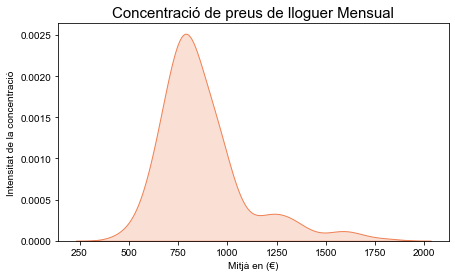

In [28]:
fig, ax = plt.subplots(figsize=(7,4))


sns.kdeplot(llog_mitja['Preu'], shade=True, color='#EF8154')
sns.set(style= "whitegrid")
plt.title('Concentració de preus de lloguer Mensual', size=15)
plt.ylabel('Intensitat de la concentració')
plt.xlabel('Mitjà en (€)')
plt.savefig('dens_preus_llog.png')

plt.show()

### Comentaris del gráfic

1. Hem fet servir en aquesta oportunitat la llibrería Seaborn. A través del seu gràfic de densidad hem pogut visualitzar on es produeix la major concentració o densitat de preus de lloguer del dataframe 'llog_mitja'.
2. Aquest és un exemple senzill però molt potent que ens parla que els preus de lloguer mensual están el voltant dels 800 euros
3. Desprès de la gran concentració de preus el voltant dels 800 euros, podem identificar una altra petita concentració de pisos "cars", on els preus tenen una mitjà entre 1100 i 1300 euros.

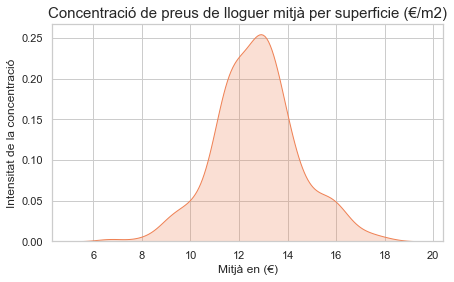

In [29]:
fig, ax = plt.subplots(figsize=(7,4))


sns.kdeplot(llog_m2['Preu'], shade=True, color='#EF8154')
sns.set(style= "whitegrid")
plt.title('Concentració de preus de lloguer mitjà per superficie (€/m2)', size=15)
plt.ylabel('Intensitat de la concentració')
plt.xlabel('Mitjà en (€)')
plt.savefig('dens_m2_llog.png')


plt.show()

### Comentaris del gráfic

1. Aquest gràfic ens permèt visualitzar els preus mensuals de lloguer per metre quadrat. És a dir, amb això tenim una mesura del valor del sòl d'un lloc determinat. El igual que en el gràfic per lloguer mensual aquí tenim una concentració molt clara el voltant dels 13 euros de lloguer mensual per metre quadrat.
2. En els dos gràfics veiem una distribució bastant normal de les dades, semblant el que podria ser una gaussiana.

### 3. Una variable numèrica i una categòrica (Districte i Preu)

##### Per graficar aquestes dues columnes cridarem una gràfrica de Seaborn que és diu boxplot

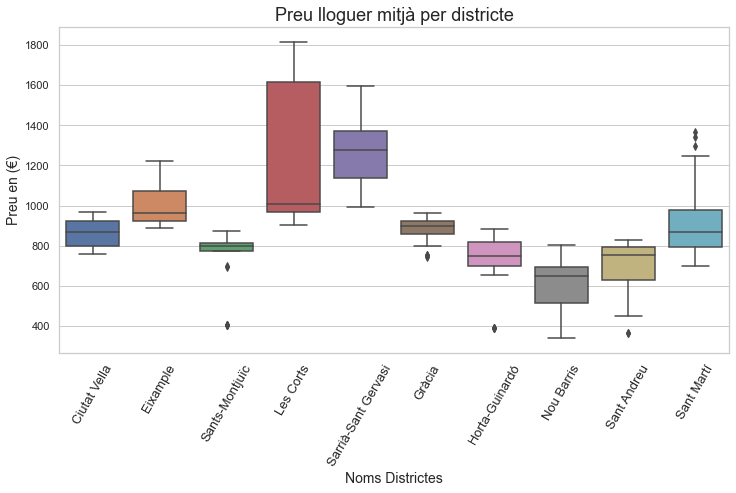

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x=llog_mig['Nom_Districte'], y=llog_mig['Preu'], data=llog_mitja)
plt.title('Preu lloguer mitjà per districte', size=18)
plt.ylabel('Preu en (€)', fontsize=14)
plt.xlabel('Noms Districtes', fontsize=14)
plt.xticks(fontsize=13, rotation = 60)
plt.savefig('stripplot_llog_mitja_mensual.png')

plt.show()

### Comentaris del gráfic

1. El gràfic de caixa anterior ens permetre conèixer molta informació en només una visualització. Per una banda, podem veure que la majoria de les dades de preus de lloguer mitjà dels districtes, es concentra entre els 700 i 1000 euros. Districtes com Ciutat Vella, Horta Guinardó, San Martí, Gràcia o Sants-Montjuïc presentan una dispersió de les seves dades força simètrica i normal. D'un altra banda com Les Corts, Eixample, Nou Barris o Sant Andreu ens parlen de distribucions asimètriques en el menys el 50% central de les seves dades.  
2. Si mirem casos específics podem analitzar Les Corts. Aquest districte, és el cas més atípic de tota la mostra si ens basem només en aquest tipus de gràfic. Aquest districte té una distribució asimètrica i amb una dispersió important de les seves dades. El segon quartil porta una distribució concentrada entre els 950 euros i els 1000/1050 euros. Mentre que, el tercer quartil distribueix les seves dades entre els 1050 euros i els 1600. La mitjana de les dades es queda en els 1050 euros i el quart quartil estén encara més la dispersió arribant fins els 1800 euros. Aquesta distribució guarda relació amb el territori, on podem veure barris de classe mitjana el voltant de carrer Berlín i classe alta com Pedralbes.
3. També podem veure valors atípics a Sants-Montjüic, Gràcia,Horta i Sant Andreu, la majoria aprop del primer quartil.
4. Sens dubte els districtes més cars són Les Corts i Sarrià-Sant Gervasi. Aquests dos districtes tenen una diferència en la seva distribució. Perqué, Sarrià-Sant Gervasi presenta una distribució bastant simétrica on la mitjana és molt aprop de la mitjà i les dades entre tots els quartils, presenten una distribució proporcional i simètrica.

### Dues variables numèriques (Any o Trimestre i Preu)

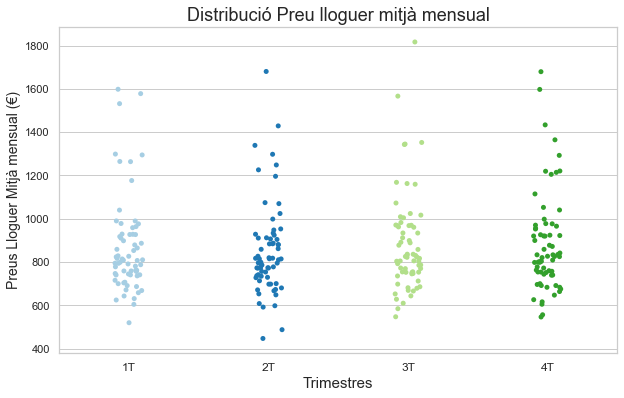

In [31]:
fig, ax = plt.subplots(figsize=(10,6))


sns.stripplot(x= 'Trimestre', y= 'Preu', data= llog_mitja, palette='Paired')
plt.title('Distribució Preu lloguer mitjà mensual', size=18)
plt.xticks(np.arange(4),('1T', '2T', '3T', '4T'), fontsize=12)
plt.xlabel('Trimestres',fontsize=15)
plt.ylabel('Preus Lloguer Mitjà mensual (€)',fontsize=14)
plt.savefig('stripplot_Trimestre.png')
plt.show()

### Comentaris del gràfic

1. El gráfic stripplot ens mostra que la distribució per trimestre no canvia gaire. També és pot interpretar que el dividir el dataset sencer en quatre és perd potencia de la visualització, pot ser per ser massa pocs punts. Veurem que passa amb el datset sencer per any.

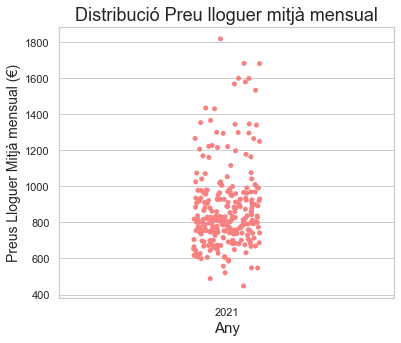

In [32]:
fig, ax = plt.subplots(figsize=(6,5))


sns.stripplot(x= 'Any', y= 'Preu', data= llog_mitja, color='#F78181')
plt.title('Distribució Preu lloguer mitjà mensual', size=18)
plt.xlabel('Any',fontsize=15)
plt.ylabel('Preus Lloguer Mitjà mensual (€)',fontsize=14)
plt.savefig('stripplot_any.png')
plt.show()

### Comentaris del gràfic

1. Si fem el mateix gràfic però per any, estem agafant el dataset anterior però per quatre, per tant, tenim molta millor mostra per representar. El efecte produït és que, el gràfic és una mica més fàcil d'entrendre i es veuen molt millor les concentracions de dades, com per exemple, la major densitat de preus el voltant dels 800 euros.

### 5. Tres variables (Barri o Districte, Trimestre i Preu)

##### Farem servir un altre cop el boxplot, però ara per representar el preu de lloguer mensual per districtes, però obert per trimestres. L'única gran diferència en el codi per obtenir aquest gràfic, és afegir l'argument 'hue'. Aquest argument, actua com una tercera variable categòrica que farem servir per donar una tercera dimensió el gràfic.

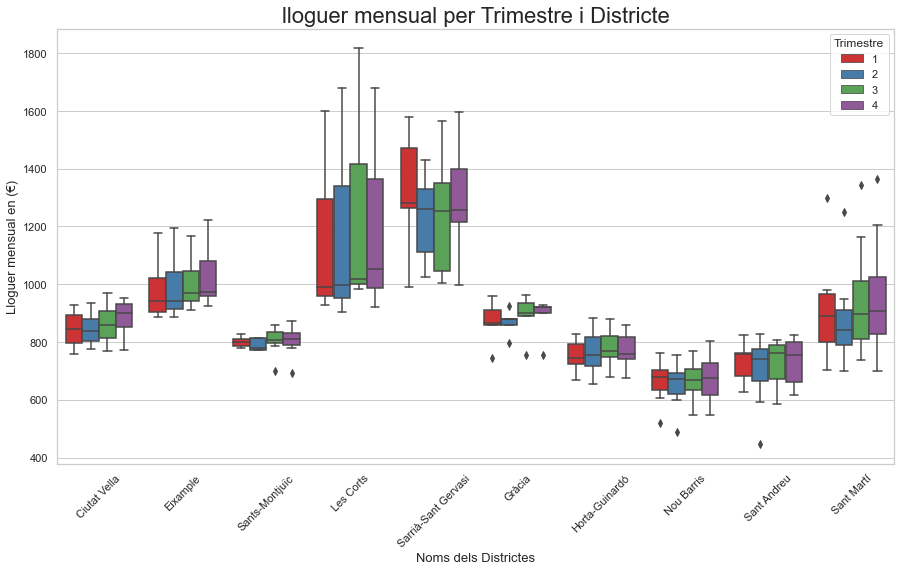

In [33]:
plt.figure(figsize=(15,8))

sns.boxplot(x = 'Nom_Districte', y='Preu', hue = 'Trimestre', data = llog_mitja, palette='Set1')
plt.title('lloguer mensual per Trimestre i Districte', fontsize=22)
plt.xlabel('Noms dels Districtes', fontsize=13)
plt.ylabel('Lloguer mensual en (€)', fontsize=13)
plt.xticks(rotation = 45)
plt.savefig('box_3_variables.png')

plt.show()

### Comentaris del gráfic

1. En el exercici tres vam fer comentaris força estesos de les característiques del boxplot, que ara mateix no les repetirem perqué tenim les mateixes dades. Però, ara hem afegit una nova variable (trimestre), la qual ens afegeix per exemple, com hi ha una petita tendència cap una pujada de la mitjana dels preus del trimestre quatre en molts dels districtes.

2. Per un altre costat, com que aquí més detall de les dades podem veure llavors llocs específics (en el temps) on és produeixen les dades atípiques. D'questa manera les dades atípiques canvien a diferència de l'exercici tres on només hem vist dades atípiques o amunt o avall dels quartils extrems, en canvi, aquí en podem veure amunt i avall com en el cas del segon trimestre a Gràcia.

# Exercici 2

Exporta els gràfics com imatges o com HTML.

### Cada exercici té guardada la seva imatge com a .PNG

# Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.

##### Exemple 1. Una representació senzilla però efectiva, i que no he fet servir fins ara és el diagrama de "Pie". 

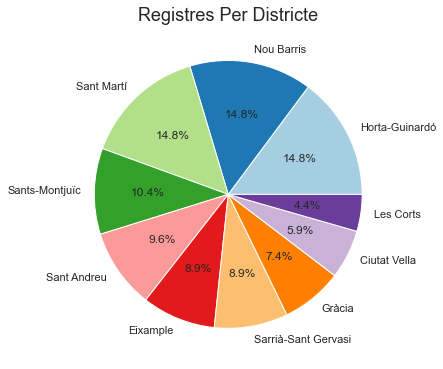

In [34]:
freq_dist = llog_mitja['Nom_Districte'].value_counts()
plt.figure(figsize=(6,7))
plt.pie(freq_dist.values, labels=freq_dist.index, colors=sns.color_palette('Paired'), autopct='%1.1f%%')
plt.title('Registres Per Districte', fontsize=18)
plt.savefig('Participació districtes.png')
plt.show()

### Comentaris del gráfic

1. El gràfic ens exposa la diversitat de registres per districtes, amb el percentatge correponent de cada districte. Així mateix, podem fer un cop d'ull ràpid sobre quins són els districtes amb major representació del dataset. En aquest cas, tenim que Sant martí, Nou Barris i Horta-Guinardó es porten gairebé el 45% dels registres.

##### Exemple 2. Ara farem servir un nou boxplot, però mirarem de manera simultània dues columnes d'un dataframe. Per una banda visualitzarem el lloguer mitjà mensual i d'altra el preu del metre quadrat dels mateixos lloguers. 

##### El principal argument que s'introdueix per generar la vista simultània, és afegir adins del subplot, l'ubicació d'un subplot  endins d'una figura amb múltiples subplots (en aquest cas, només dos). Doncs, la primera imatge l'aconseguim especificant que s'ubicará en la primera posició, dins d'una sèrie de subplots que només tindrà una fila i dues columnes. Per aconseguir la segona, només hem de canviar l'últim número per un dos (generant el segon plot).



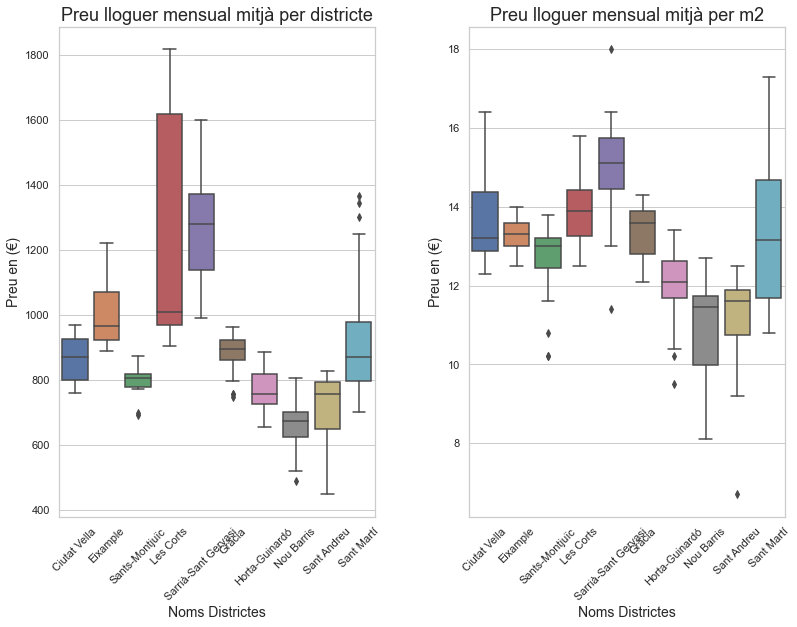

In [52]:
plt.figure(figsize=(13,10))
 
plt.subplot(121)
sns.boxplot(x = llog_mitja['Nom_Districte'], y = llog_mitja['Preu'])
plt.title('Preu lloguer mensual mitjà per districte', size=18)
plt.ylabel('Preu en (€)', fontsize=14)
plt.xlabel('Noms Districtes', fontsize=14)
plt.xticks(rotation = 45)

plt.subplot(122)
sns.boxplot(x = llog_m2['Nom_Districte'], y = llog_m2['Preu'])
plt.title('Preu lloguer mensual mitjà per m2', size=18)
plt.ylabel('Preu en (€)', fontsize=14)
plt.xlabel('Noms Districtes', fontsize=14)
plt.xticks(rotation = 45)

plt.savefig('comparativa_boxplots.png')

plt.subplots_adjust(wspace=0.3, bottom=0.2)



### Comentaris del gráfic

1. Com que ja hem fet l'anàlisi d'aquestes dades anteriorment ara només comentarem un parell de coses. Aqueste manera és molt potent per adonar-nos ràpidament que les dades del lloguer mitjà a diferència del metre quadrat, es troben molt més disperses que en el segon cas. Llavors, les mostres del segon gràfic queden totes més agrupades en al voltant de la mitjana.

##### Exemple 3. Ara visualitzarem un nou gráfic que és diu Histograma. Novament farem servir la visualitzaciò simultània però en aquest cas d'una manera una mica diferent. A l'inici de tot quan definim com serà la figura, posarem que crearem dos subplots en una sola fila i en dues columnes. Desprès, més avall, indicarem que dins de la matriu d'objectes 'axs' crearem el primer subplot [0] i el segon subplot [1].

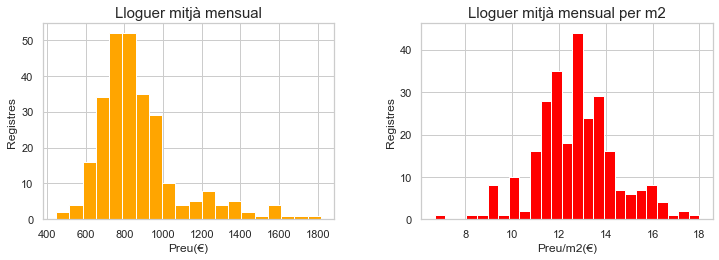

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(llog_mitja['Preu'], bins=20, color='orange')
axs[0].set_title('Lloguer mitjà mensual',fontsize=15)
axs[0].set_xlabel('Preu(€)')
axs[0].set_ylabel('Registres')

axs[1].hist(llog_m2['Preu'], bins=25, color='red')
axs[1].set_title('Lloguer mitjà mensual per m2', fontsize=15)
axs[1].set_xlabel('Preu/m2(€)')
axs[1].set_ylabel('Registres')

plt.subplots_adjust(wspace=0.3, bottom=0.2)

plt.savefig('comparativa_histrogrames.png')

plt.show()

### Comentaris del gráfic

1. Les dades ja han sigut comentades en altres visualitzacions, per tant, no cal ara mateix tornar a explicar-les.